# Introduction 

This is a newer version of the previous notebook that is based on the same goal, to predict the house prices, by using the same databases. However, in this notebook the aim is to apply a deeper and more detailed understanding of how to analyze and clean up the data. While also making more intricate regression models.

[Inspiration](https://www.kaggle.com/masumrumi/a-detailed-regression-guide-with-house-pricing/comments)

# Importing libraries 

In [72]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=None
import matplotlib.gridspec as gridspec
from scipy.stats import skew
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import scipy.stats as stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, Ridge, Lasso, LassoLars
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler, PolynomialFeatures
import matplotlib.style as style
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import csv

# Column description 

##### IMOPRTANT TO ALWAYS LOOK AT THE DATABASE AND KEEP A KEEN EYE ON THE FEATURES AND THEIR DEPENDENCIES

In [2]:
with open('data_description.txt', 'r') as f:
    desc = f.readlines()

desc = [line.strip() for line in desc]
desc

['MSSubClass: Identifies the type of dwelling involved in the sale.',
 '',
 '20\t1-STORY 1946 & NEWER ALL STYLES',
 '30\t1-STORY 1945 & OLDER',
 '40\t1-STORY W/FINISHED ATTIC ALL AGES',
 '45\t1-1/2 STORY - UNFINISHED ALL AGES',
 '50\t1-1/2 STORY FINISHED ALL AGES',
 '60\t2-STORY 1946 & NEWER',
 '70\t2-STORY 1945 & OLDER',
 '75\t2-1/2 STORY ALL AGES',
 '80\tSPLIT OR MULTI-LEVEL',
 '85\tSPLIT FOYER',
 '90\tDUPLEX - ALL STYLES AND AGES',
 '120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 '150\t1-1/2 STORY PUD - ALL AGES',
 '160\t2-STORY PUD - 1946 & NEWER',
 '180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 '190\t2 FAMILY CONVERSION - ALL STYLES AND AGES',
 '',
 'MSZoning: Identifies the general zoning classification of the sale.',
 '',
 'A\tAgriculture',
 'C\tCommercial',
 'FV\tFloating Village Residential',
 'I\tIndustrial',
 'RH\tResidential High Density',
 'RL\tResidential Low Density',
 'RP\tResidential Low Density Park',
 'RM\tResidential Medium Density',
 '',
 'LotFront

# Train and test file opens 

In [3]:
with open('train.csv', 'r', encoding='utf-8') as f:
    train = pd.read_csv(f)
    
train.name = 'Train'
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [4]:
with open('test.csv', 'r', encoding='utf-8') as f:
    test = pd.read_csv(f)

test.name='Test'
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Describing the datasets 

In [5]:
def df_shape(df):
    """Function is to display the database name along with the number of rows and columns within it"""
    print(f"{df.name} has {df.shape[0]} rows and {df.shape[1]} columns")
    return None

df_shape(train)
df_shape(test)

Train has 1460 rows and 81 columns
Test has 1459 rows and 80 columns


# Handling missing values 

## Missing matrix

### Train 

In [6]:
def missing_values(df):
    """Function to make a missing matrix graph for the table and also to make a table to count the number and percent of missing values 
        in each column that has 1 or more missing values in them"""
    msno.matrix(df)
    plt.title(f"{df.name} dataset missing values matrix", size=30)
    plt.show()

    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) > 0]
    percent = np.round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[df.isnull().sum().sort_values(ascending=False) > 0]
    print(f"Missing values for {df.name} table:")
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

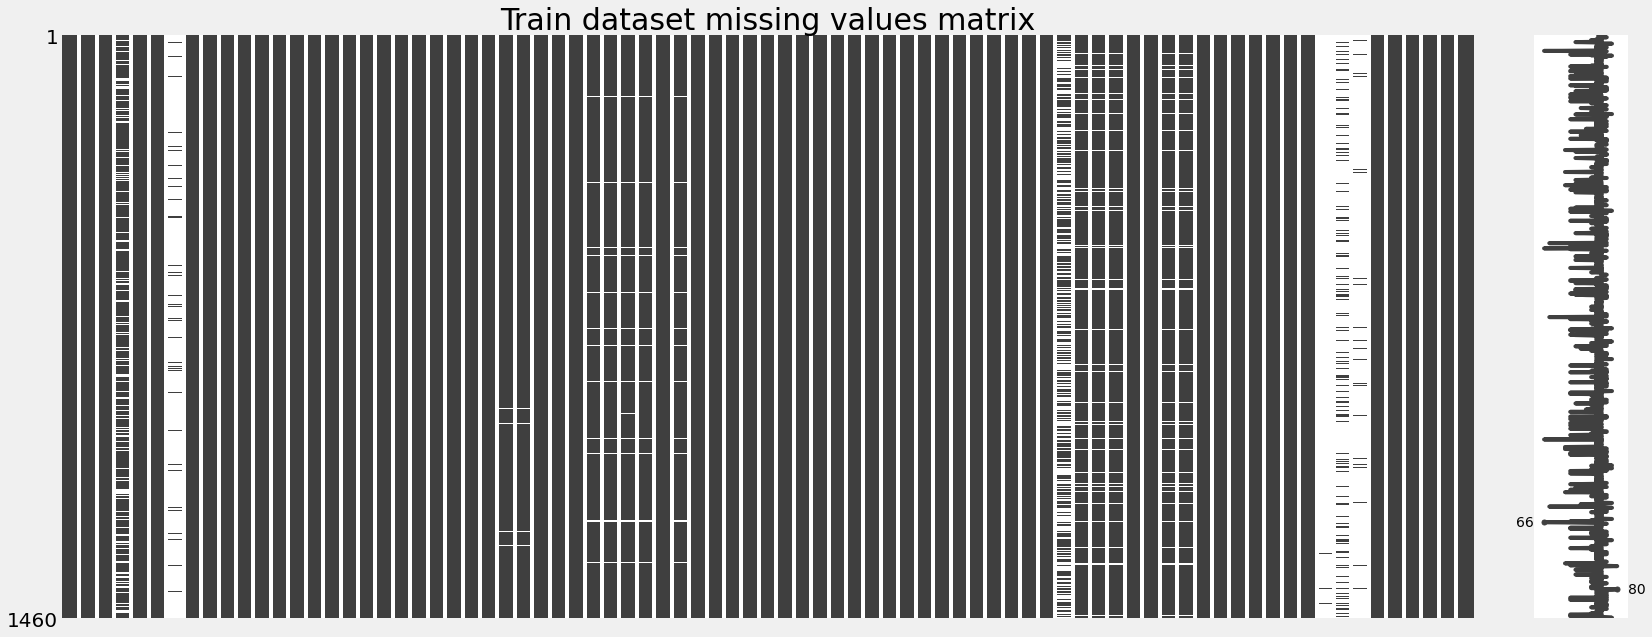

Missing values for Train table:


,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [7]:
missing_values(train)

### Test 

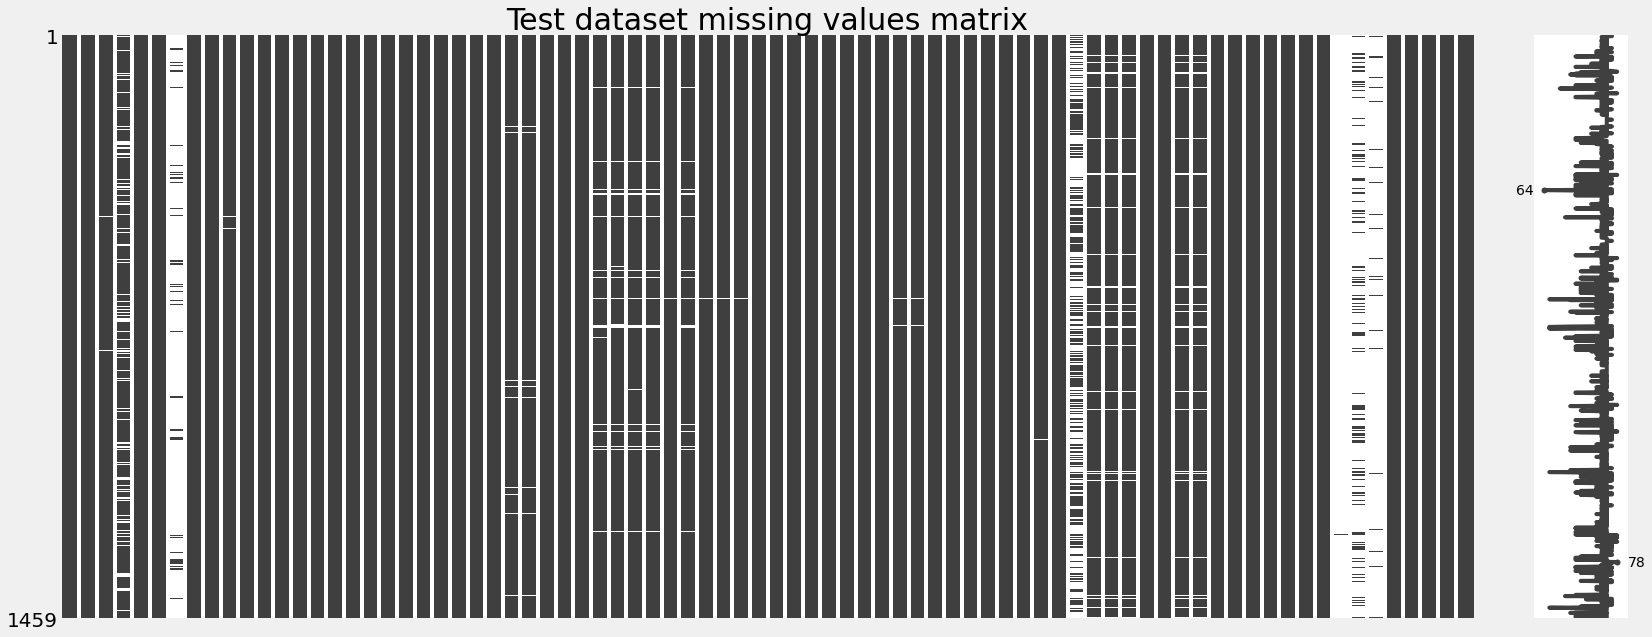

Missing values for Test table:


,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


In [8]:
missing_values(test)

## Summary 

* From the missing matrix graph and the missing values tables, we can see that quite a few features have missing values, some a lot more than others.

* There are many types of features

# Target Variable 

Let's focus on SalePrice, which is the target variable, and make basic observations on it.

In [9]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Now to look at the distributions of SalePrice

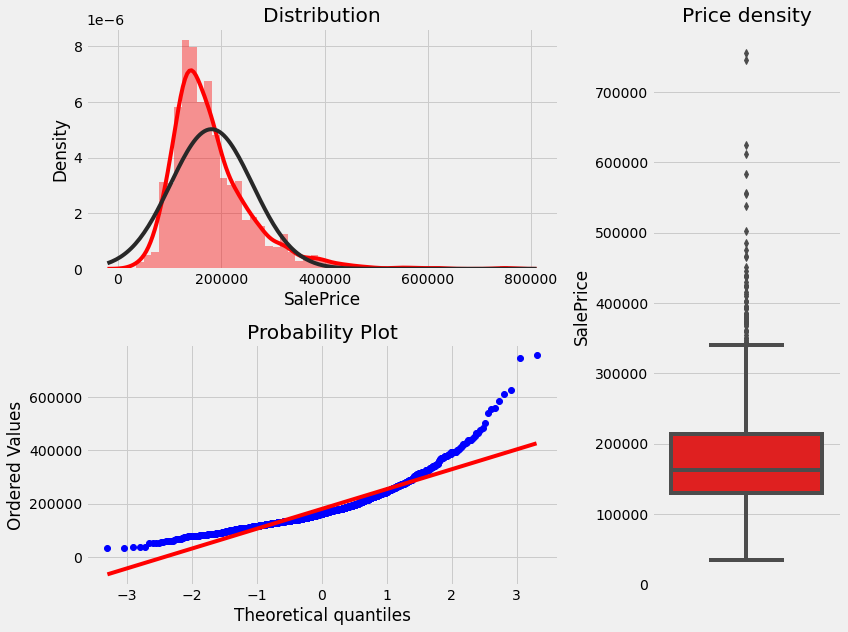

In [10]:
def plot_3(df, var):
    """Function to make a plot 3 charts to show the distribution, probability plot and the box plot of a variable in a dataset"""
    fig = plt.figure(constrained_layout=True, figsize=(12, 9))
    grid = gridspec.GridSpec(nrows=2, ncols=3, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    sns.distplot(df[var], fit=norm, ax=ax1, norm_hist=True, color='red')
    ax1.set_title('Distribution')
    plt.tight_layout()

    ax2 = fig.add_subplot(grid[1, :2])
    stats.probplot(df[var], plot=ax2)
    plt.tight_layout()

    ax3 = fig.add_subplot(grid[:2, 2])
    sns.boxplot(y=df[var], ax=ax3, color='red')
    ax3.set_title('Price density')
    plt.tight_layout()
    plt.show()
    
plot_3(train, 'SalePrice')

These charts tell us a couple of things:
   
   * The SalePrice is not normally distributed
   * SalePrice is right skewed
   * And there are quite a few outliers in SalePrice
   * As the year increases, the price also increases

# Skewness and Kurtosis 

In [11]:
print('Skewness (SalePrice): {}'.format(train.SalePrice.skew()))
print('Kurtosis (SalePrice): {}'.format(train.SalePrice.kurt()))

Skewness (SalePrice): 1.8828757597682129
Kurtosis (SalePrice): 6.536281860064529


## Skewness

Skewness

* is the degree of distortion from the symmetrical bell curve or the normal curve.
* So, a symmetrical distribution will have a skewness of "0".
* There are two types of Skewness: Positive and Negative.
* Positive Skewness(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter.
* In positive Skewness the mean and median will be greater than the mode similar to this dataset. Which means more houses were sold by less than the average price.
* Negative Skewness means the tail on the left side of the distribution is longer and fatter.
* In negative Skewness the mean and median will be less than the mode.
* Skewness differentiates in extreme values in one versus the other tail.


![Skewness](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

## Kurtosis

In probability theory and statistics, Kurtosis is the measure of the "tailedness" of the probability. distribution of a real-valued random variable. So, In other words, it is the measure of the extreme values(outliers) present in the distribution.

* There are three types of Kurtosis: Mesokurtic, Leptokurtic, and Platykurtic.
* Mesokurtic is similar to the normal curve with the standard value of 3. This means that the extreme values of this distribution are similar to that of a normal distribution.
* Leptokurtic Example of leptokurtic distributions are the T-distributions with small degrees of freedom.
* Platykurtic: Platykurtic describes a particular statistical distribution with thinner tails than a normal distribution. Because this distribution has thin tails, it has fewer outliers (e.g., extreme values three or more standard deviations from the mean) than do mesokurtic and leptokurtic distributions.


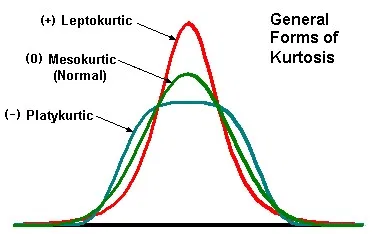

# Correlations 

In [12]:
train_corr = train.corr()
train_corr = train_corr.sort_values(by='SalePrice', ascending=False)
train_corr['SalePrice'] # correlation with SalePrice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

## Seeing the highest correlations on a graph 

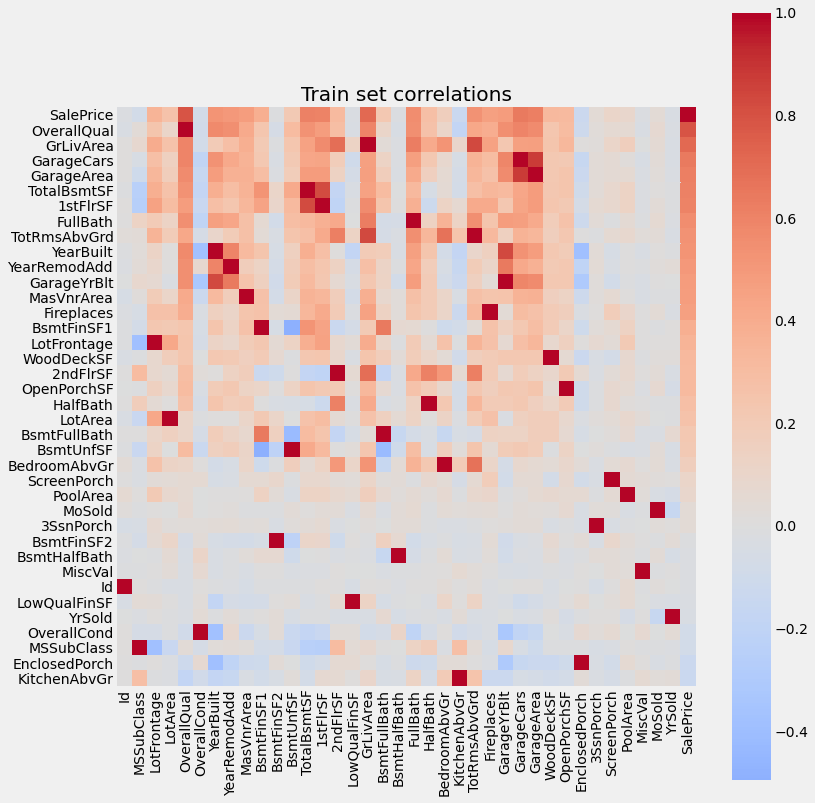

In [13]:
plt.figure(figsize=(12, 12))
sns.heatmap(train_corr, cmap='coolwarm', square=True, center=0)
plt.title('Train set correlations')
plt.tight_layout()
plt.show()

## Specific SalePrice correlations 

In [14]:
def custom_scatter(df, x1, x2):
    fig = plt.figure(figsize=(11, 8.5), constrained_layout=True)
    grid = gridspec.GridSpec(nrows=2, ncols=4, figure=fig)
    
    ax = fig.add_subplot(grid[0, :])
    sns.regplot(x=x1, y='SalePrice', scatter_kws={'s':5, 'color':'black'}, line_kws={'color':'red'}, data=df, ax=ax)
    plt.title(f"SalePrice/{x1}", size=14)
    plt.tight_layout()
    
    ax1 = fig.add_subplot(grid[1, :])
    sns.regplot(x=x2, y='SalePrice', scatter_kws={'s':5, 'color':'black'}, line_kws={'color':'red'}, data=df, ax=ax1)
    plt.title(f"SalePrice/{x2}", size=14)
    plt.tight_layout()
    plt.show()

### OverallQual & GrLivArea

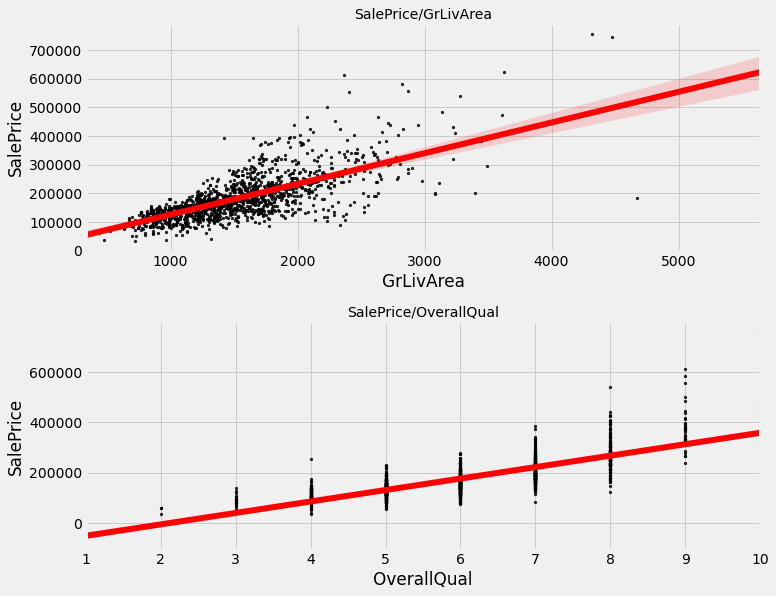

In [15]:
custom_scatter(train, 'GrLivArea', 'OverallQual')

### GarageArea & TotalBsmtSF

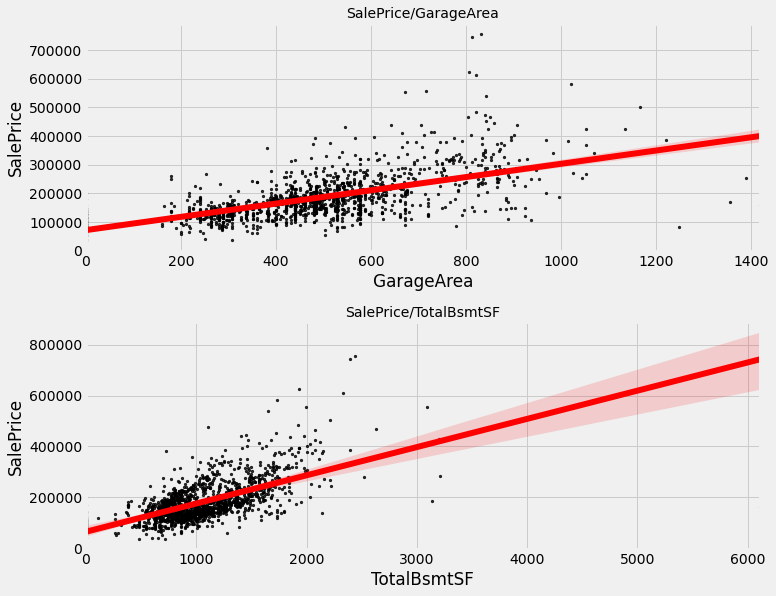

In [16]:
custom_scatter(train, 'GarageArea', 'TotalBsmtSF')

### 1stFlrSF & YearBuilt 

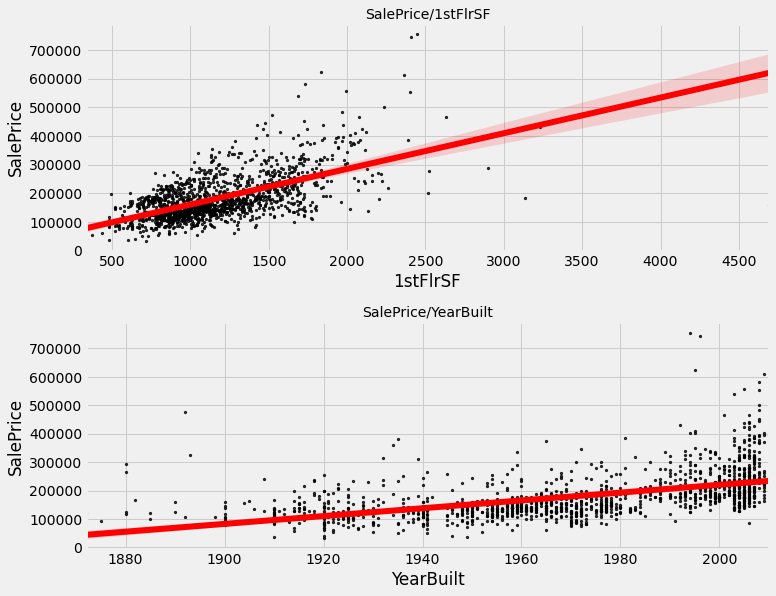

In [17]:
custom_scatter(train, '1stFlrSF', 'YearBuilt')

## Observations 
* SalePrice shows an unequal level of variance across most predictor variables
* There are quite a few outliers that don't necessarily follow the general trend

# Formatting data 

## Rules to follow when making a Linear Regression Model 

* **Linearity (Correct functional form)**
* **Homoscedasticity (Constant Error Variance vs Heteroscedasticity).**
* **Independence of Errors vs Autocorrelation)**
* **Multivariate Normality (Normality of Errors)**
* **No or little Multicollinearity.**

### Linearity 
Linearity(Correct functional form): Linear regression needs the relationship between each independent variable and the dependent variable to be linear. The linearity assumption can be tested with scatter plots. The following two examples depict two cases, where no or little linearity is present.

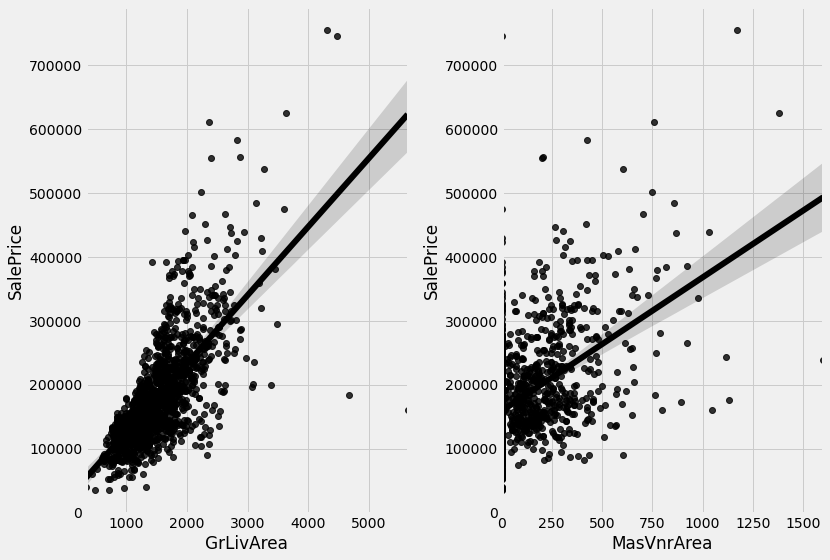

In [18]:
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2, sharey=False)
sns.regplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1, color='black') # line of best linear fit plot
plt.tight_layout()

sns.regplot(x=train.MasVnrArea, y=train.SalePrice, ax=ax2, color='black')
plt.tight_layout()

In this case, GrLivArea has a better linear relationship with SalePrice than MasVnrArea and SalePrice. Another **very important** thing, to check for outliers as the have a big detrimental effect to making an accurate linear regression model, we can alos use a residual plot to check the error variance across the true line. We can check the residual plot for SalePrice and GrLivArea

As we can see from the above residual plot, the graph is in the shape of a cone, the variance increasing as the values increase, this is known as **heteroscedasticity**. This variance should be controlled a little, instead of having a cone shape, the shape of the variance should be more rectangular, this is **homoscedasticity**. The variance. 

### Homoscedasticity

**Homoscedasticity ( Constant Variance )**: The assumption of Homoscedasticity is crucial to linear regression models. Homoscedasticity describes a situation in which the error term or variance or the "noise" or random disturbance in the relationship between the independent variables and the dependent variable is the same across all values of the independent variable. In other words, there is a constant variance present in the response variable as the predictor variable increases. If the "noise" is not the same across the values of an independent variable like the residual plot above, we call that Heteroscedasticity. As you can tell, it is the opposite of Homoscedasticity.

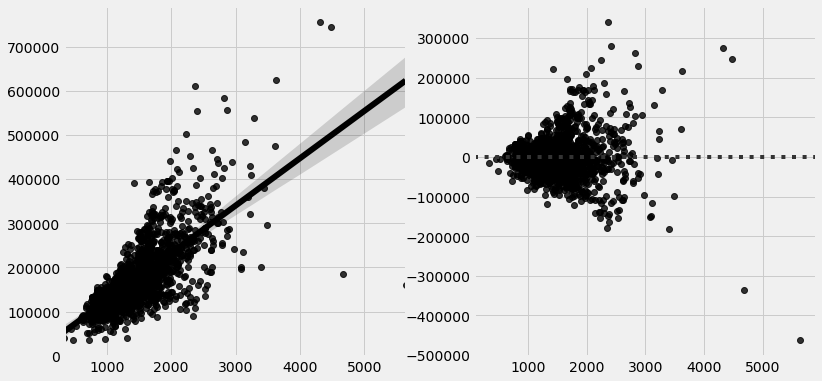

In [19]:
pretransformed_grlivarea = list(train.GrLivArea)
pretransformed_saleprice = list(train.SalePrice)

fig, (ax1, ax2) = plt.subplots(figsize=(12, 6), ncols=2)
sns.regplot(x=pretransformed_grlivarea, y=pretransformed_saleprice, color='black', ax=ax1)
sns.residplot(x=pretransformed_grlivarea, y=pretransformed_saleprice, color='black', ax=ax2)
plt.show()

### Multivariate Normality (Normality of Errors)
The linear regression analysis requires the dependent variable to be multivariate normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. The goodness of fit test, e.g., the Kolmogorov-Smirnov test can check for normality in the dependent variable. We already know that our target variable does not follow a normal distribution. Let's bring back the three charts to show our target variable.

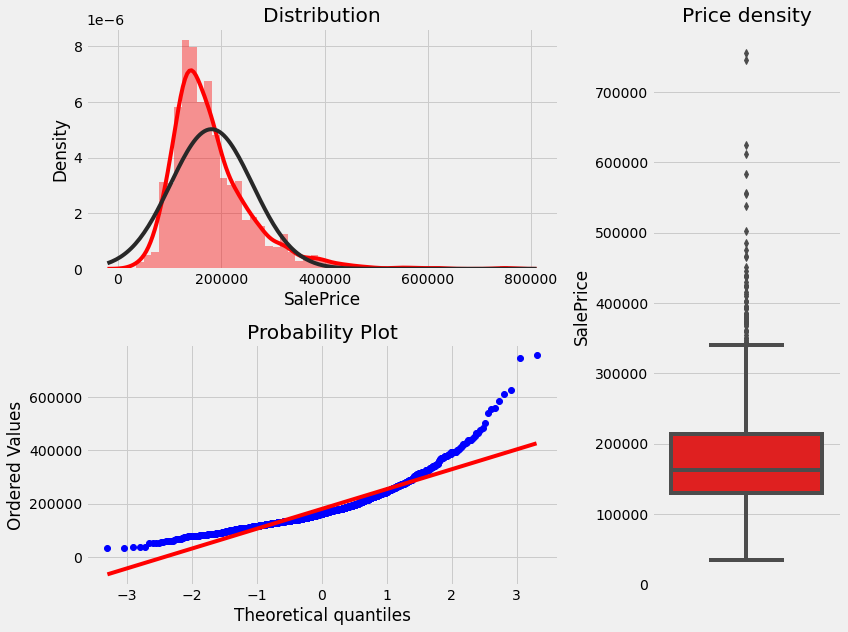

In [20]:
plot_3(train, 'SalePrice')

Now for situations like this, simply log transforming the variable values will fix the distribution.

In [21]:
train.SalePrice = np.log(train.SalePrice) # log convert all the SalePrice in the train dataset
train.SalePrice[:5]

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

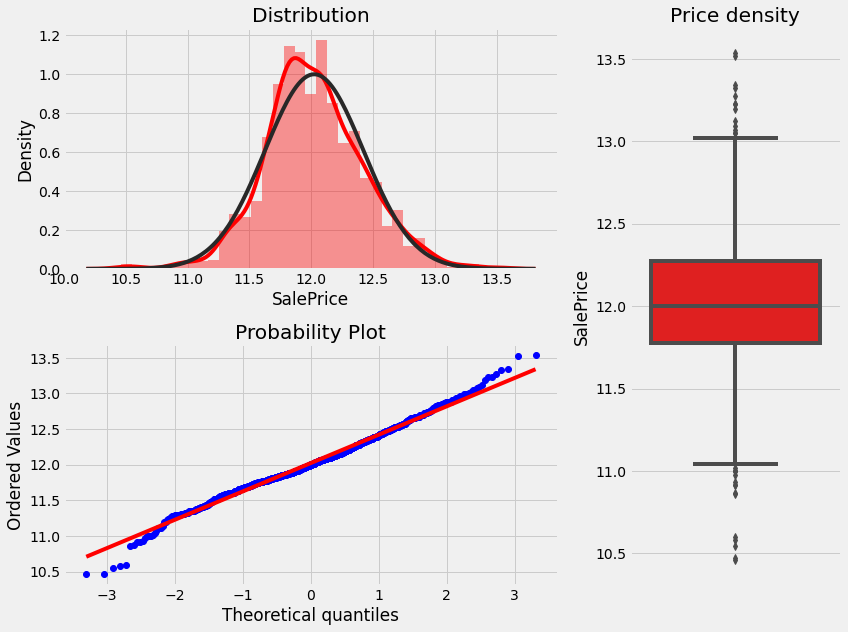

In [22]:
plot_3(train, 'SalePrice')

After the log transformation, the normality errors for SalePrice are now fixed, let's check the variance via residual plots now.

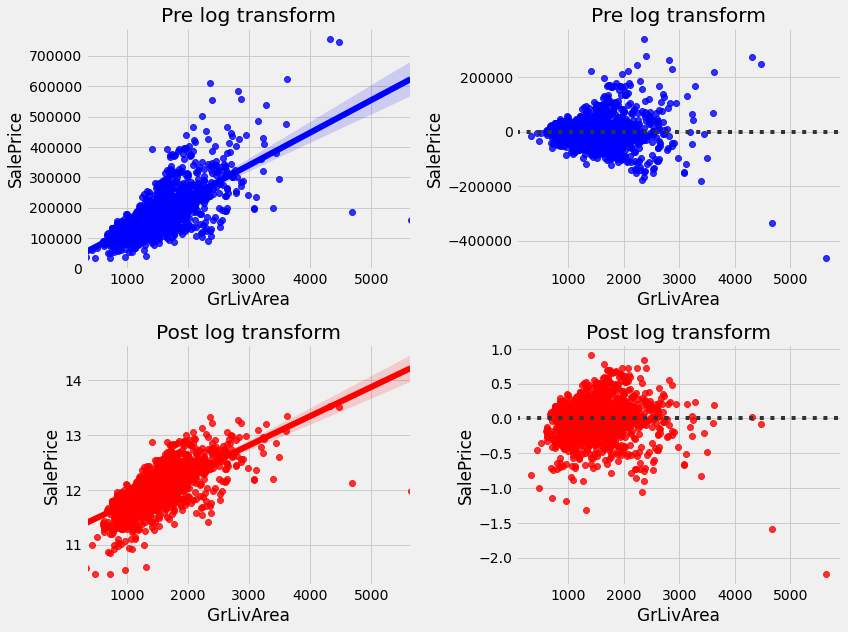

In [23]:
fig = plt.figure(figsize=(12, 9), constrained_layout=True)
grid = gridspec.GridSpec(nrows=4, ncols=4, figure=fig)

ax1 = fig.add_subplot(grid[:2, :2])
sns.regplot(x=pretransformed_grlivarea, y=pretransformed_saleprice, color='blue')
ax1.set_title('Pre log transform')
ax1.set_xlabel(xlabel='GrLivArea')
ax1.set_ylabel(ylabel='SalePrice')
plt.tight_layout()

ax2 = fig.add_subplot(grid[:2, 2:])
sns.residplot(x=pretransformed_grlivarea, y=pretransformed_saleprice, color='blue')
ax2.set_title('Pre log transform')
ax2.set_xlabel(xlabel='GrLivArea')
ax2.set_ylabel(ylabel='SalePrice')
plt.tight_layout()

ax3 = fig.add_subplot(grid[2:, :2])
sns.regplot(x='GrLivArea', y='SalePrice', data=train, color='red')
ax3.set_title('Post log transform')
plt.tight_layout()

ax4 = fig.add_subplot(grid[2:, 2:])
sns.residplot(x='GrLivArea', y='SalePrice', data=train, color='red')
ax4.set_title('Post log transform')
plt.tight_layout()

* There is **heteroscedasticity** for both graphs in the pre log transformation graphs. The conical shape of the graph is still present.



* However, there is **homoscedasticity** for both graphs in the post log transformation graphs, there is less variance as the values go up and the linear relationships are more tight than before.
    
    

### No or Little multicollinearity

Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. Multicollinearity can lead to a variety of problems, including:

* The effect of predictor variables estimated by our regression will depend on what other variables are included in our model.
* Predictors can have wildly different results depending on the observations in our sample, and small changes in samples can result in very different estimated effects.
* With very high multicollinearity, the inverse matrix, the computer calculates may not be accurate.
* We can no longer interpret a coefficient on a variable as the effect on the target of a one-unit increase in that variable holding the other variables constant. The reason behind that is, when predictors are strongly correlated, there is not a scenario in which one variable can change without a conditional change in another variable.

We can use a heatmap to look for multicollinearity 

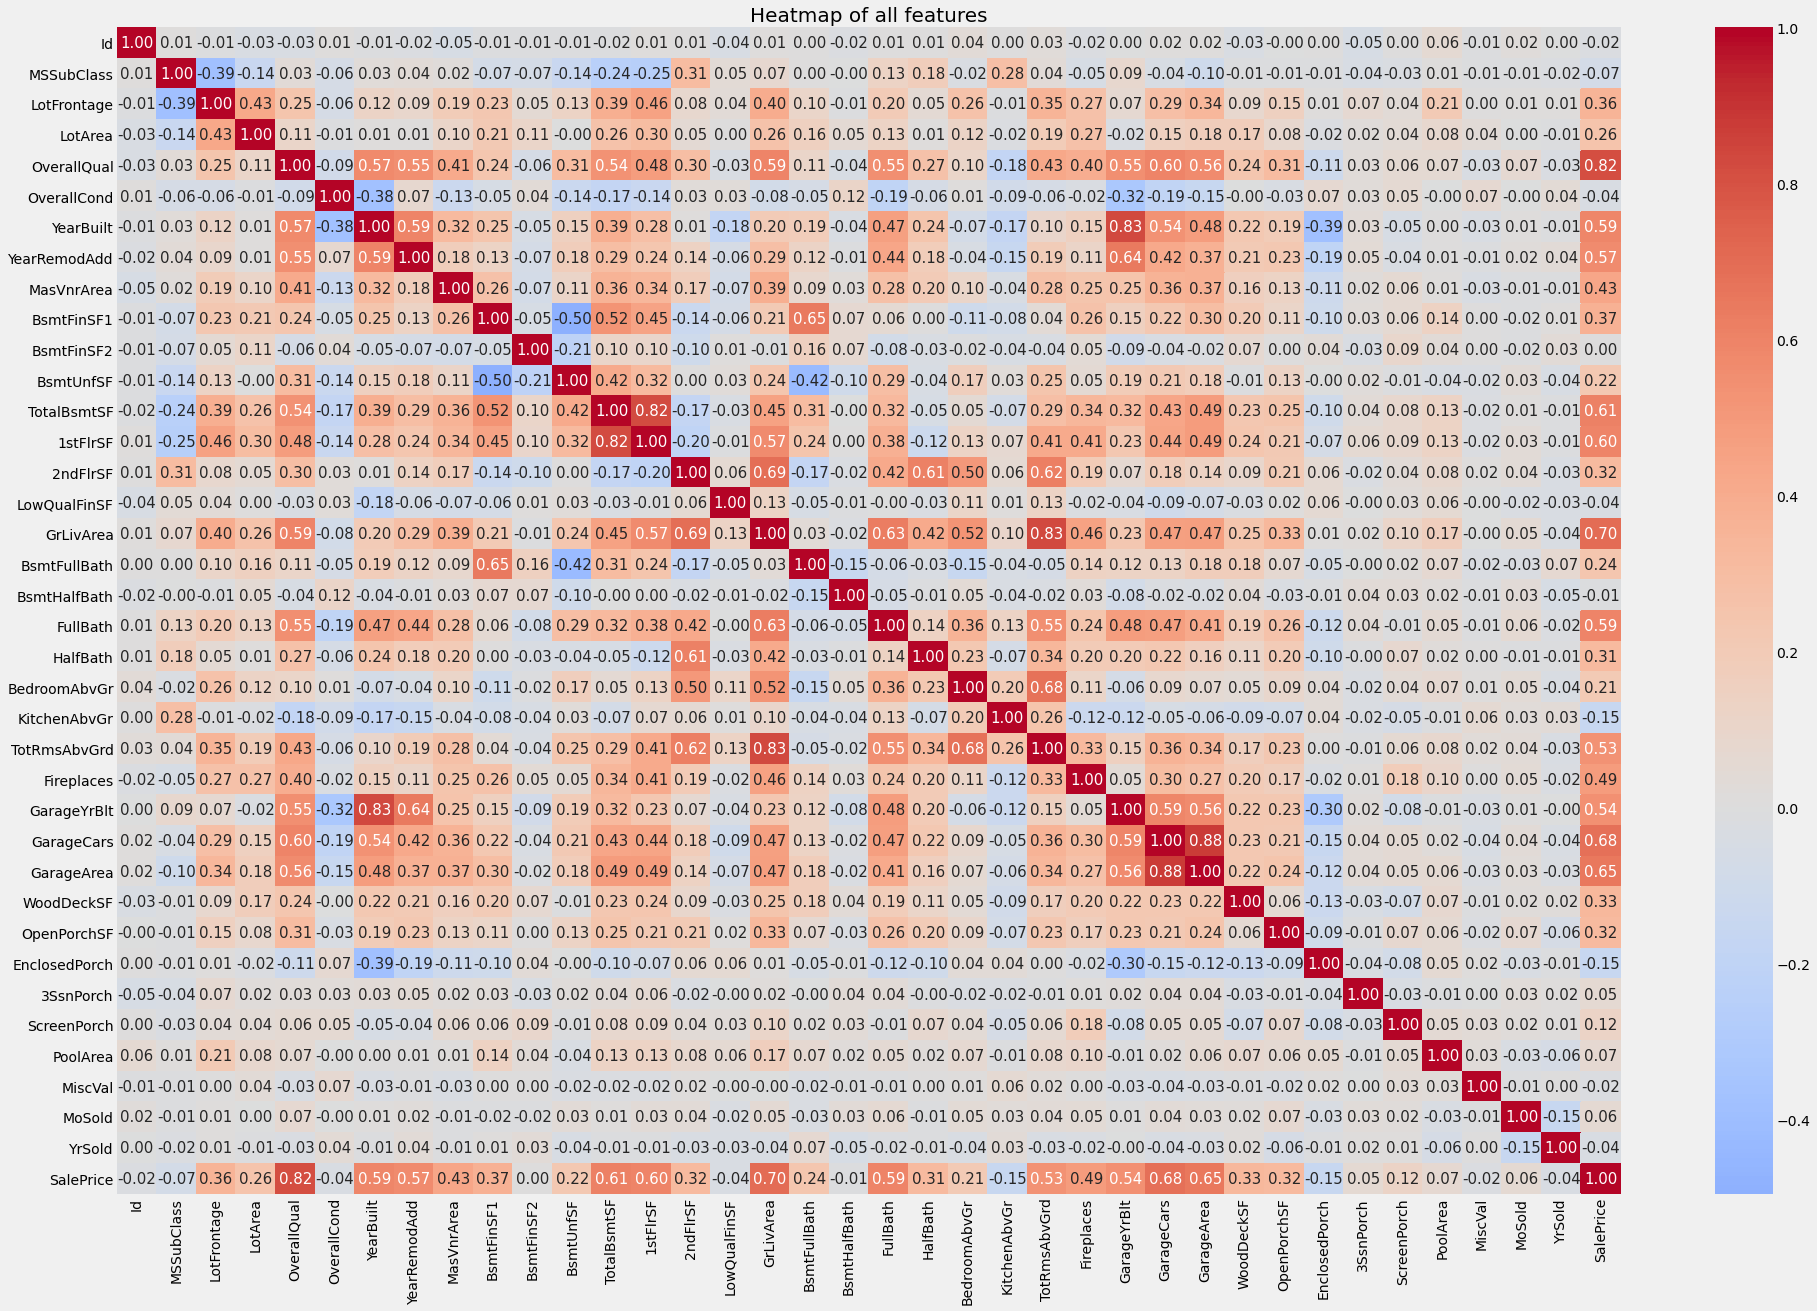

In [24]:
plt.figure(figsize=(30, 20))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':15}, center=0);
plt.title('Heatmap of all features', size=20)
plt.show()

In [25]:
train.corr()['SalePrice'].sort_values(ascending=False)[:6]

SalePrice      1.000000
OverallQual    0.817184
GrLivArea      0.700927
GarageCars     0.680625
GarageArea     0.650888
TotalBsmtSF    0.612134
Name: SalePrice, dtype: float64

### Inspecting outliers and removing them 

#### GrLivArea

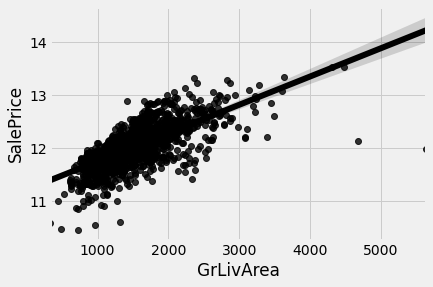

In [26]:
sns.regplot(x='GrLivArea', y='SalePrice', data=train, color='black')
plt.show()

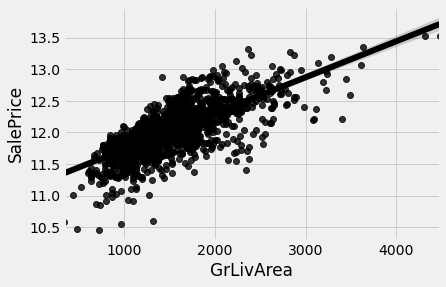

In [27]:
train = train.drop(train[train.index== 1298].index) # removing the top 2 highest GrLivArea rows
train = train.drop(train[train.index== 523].index)
sns.regplot(x='GrLivArea', y='SalePrice', data=train, color='black')
plt.show()

#### GarageCars

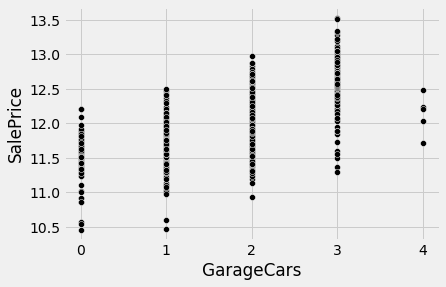

In [28]:
sns.scatterplot(x='GarageCars', y='SalePrice', data=train, color='black')
plt.show()

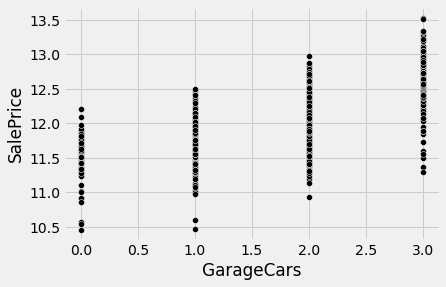

In [29]:
train = train.drop(train[train.GarageCars == 4.0].index)
sns.scatterplot(x='GarageCars', y='SalePrice', data=train, color='black')
plt.show()

# Feature Engineering 

Dropping the Id columns on both databases

In [30]:
train.drop(columns=['Id'], axis=1, inplace=True) # dropping the column ID from both databases
test.drop(columns=['Id'], axis=1, inplace=True)

y = train['SalePrice'].reset_index(drop=True) # saving the SalePrice entries
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1448    12.072541
1449    12.254863
1450    12.493130
1451    11.864462
1452    11.901583
Name: SalePrice, Length: 1453, dtype: float64

In [31]:
orig_train = train.copy()
orig_train.SalePrice = orig_train.SalePrice.transform(lambda x: np.expm1(x))
orig_train.head() # making a copy of the original train dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208499.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181499.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223499.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,139999.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,249999.0


## Combining train and test 

In [32]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop('SalePrice', axis=1, inplace=True)
all_data.name = 'All Data'
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Missing values

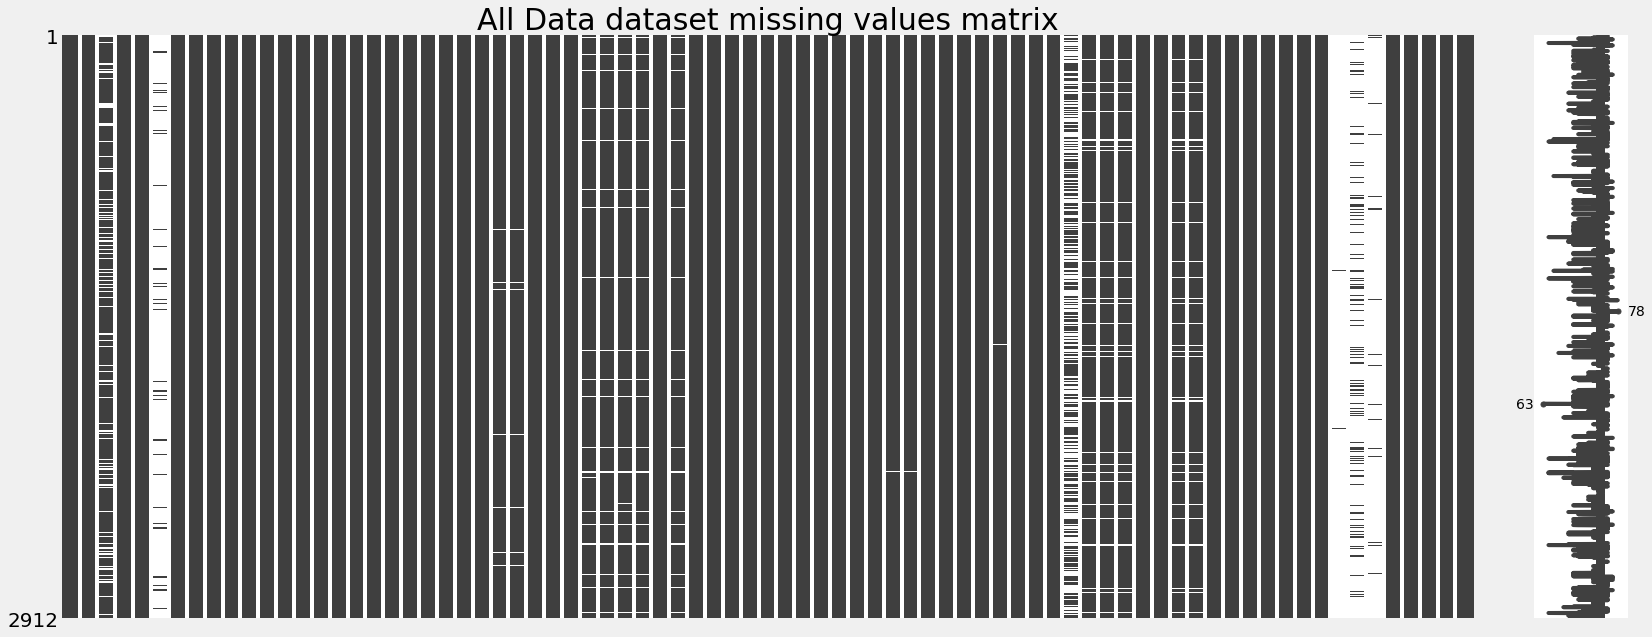

Missing values for All Data table:


,Total,Percent
PoolQC,2903,99.69
MiscFeature,2807,96.39
Alley,2715,93.23
Fence,2342,80.43
FireplaceQu,1417,48.66
LotFrontage,485,16.66
GarageCond,159,5.46
GarageQual,159,5.46
GarageYrBlt,159,5.46
GarageFinish,159,5.46


In [33]:
missing_values(all_data)

### Dependent features 

##### Looked through the features list and theire descriptions, the chosen columns were chosen because their value entirely depends on another relevant feature 

In [34]:
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType'] # dependent features

for col in missing_val_col:
    all_data[col] = all_data[col].fillna('None')

### MSSubClass and MSZoning

##### Taking the most common MSZoning value in each group of MSSubClass using that to fill empty spots

In [35]:
# filling empty MSZoning values with the most common value in each MSSubClass grouped unique value
all_data.MSZoning = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

### Filling the rest

##### The rest of the columns will be filled with their most common value or with their own respective value to indicate a lack of that particular feature

In [36]:
all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr") 

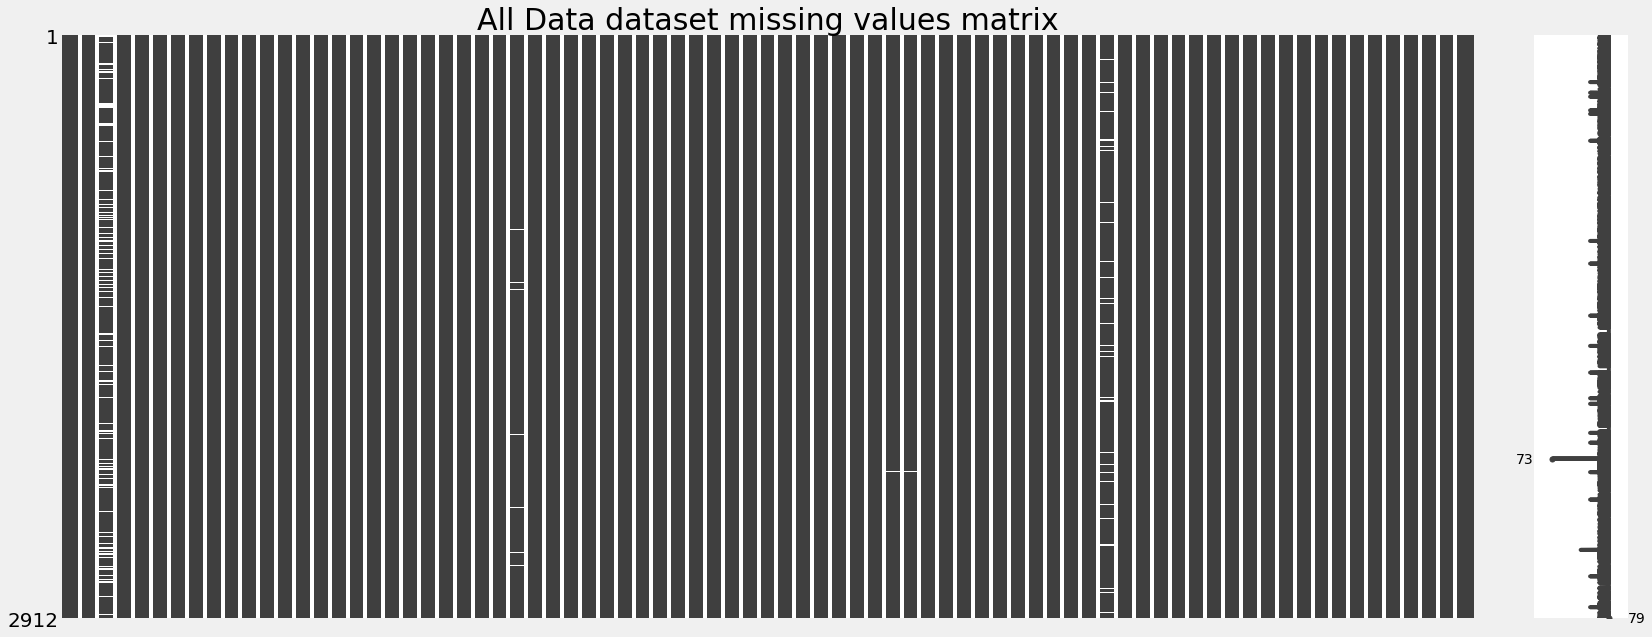

Missing values for All Data table:


,Total,Percent
LotFrontage,485,16.66
GarageYrBlt,159,5.46
MasVnrArea,23,0.79
BsmtFullBath,2,0.07
BsmtHalfBath,2,0.07
BsmtFinSF2,1,0.03
GarageCars,1,0.03
GarageArea,1,0.03
BsmtUnfSF,1,0.03
BsmtFinSF1,1,0.03


In [37]:
missing_values(all_data)

## Filling in remaining empty values 

In [38]:
more_cols = ['LotFrontage', 
                    'GarageYrBlt', 
                    'MasVnrArea', 
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'BsmtFinSF2', 
                    'GarageCars', 
                    'GarageArea', 
                    'BsmtUnfSF', 
                    'BsmtFinSF1', 
                    'TotalBsmtSF']

for col in more_cols:
    all_data[col] = all_data[col].fillna(0)

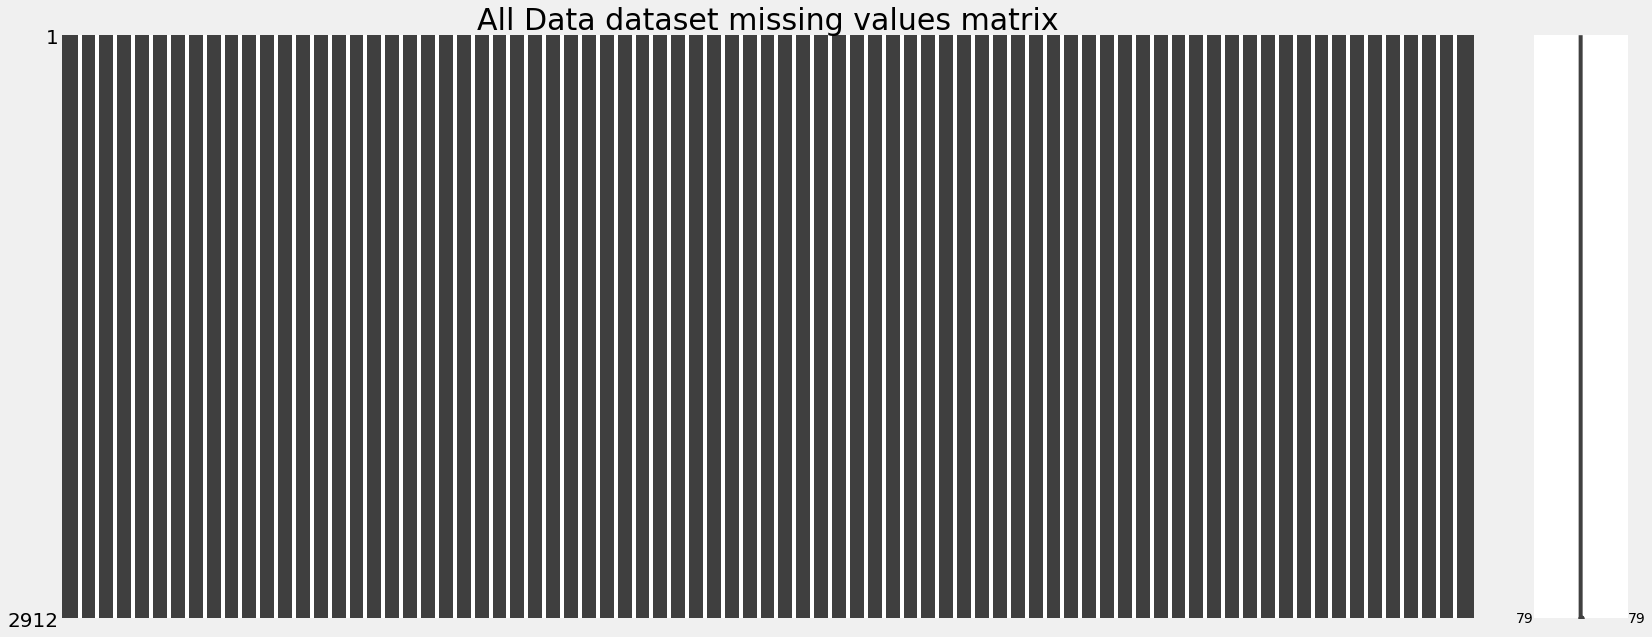

Missing values for All Data table:


,Total,Percent


In [39]:
missing_values(all_data)

##### There are no more empty values

In [40]:
all_data.shape

(2912, 79)

## Fixing data types of categorical features 

In [41]:
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].astype(float)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

## Fixing Skewness 

In [42]:
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = all_data[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_feats

MiscVal          21.920854
PoolArea         17.673354
LotArea          13.150188
LowQualFinSF     12.073977
3SsnPorch        11.362112
KitchenAbvGr      4.333199
BsmtFinSF2        4.140401
EnclosedPorch     4.008192
ScreenPorch       3.941117
BsmtHalfBath      3.940486
MasVnrArea        2.624021
OpenPorchSF       2.527396
WoodDeckSF        1.846861
1stFlrSF          1.259243
GrLivArea         1.070360
BsmtFinSF1        0.982477
BsmtUnfSF         0.921555
2ndFlrSF          0.860908
TotRmsAbvGrd      0.743880
Fireplaces        0.724985
HalfBath          0.691484
TotalBsmtSF       0.673109
BsmtFullBath      0.619808
OverallCond       0.568783
BedroomAbvGr      0.314178
GarageArea        0.198195
OverallQual       0.189698
FullBath          0.164972
LotFrontage      -0.125819
GarageCars       -0.253012
YearRemodAdd     -0.450650
YearBuilt        -0.595187
GarageYrBlt      -3.900666
dtype: float64

Taking rows with a skewness value of > 0.5 and applying log transformation to them.
**Applying log transformation works to fix the distribution as long as the feature's skewness is positive**. We are only going to apply log transformation to non categorical features

In [43]:
def fix_skew(df):
    """Function to take in a dataframe and log convert all numerical features with a positive skewness"""
    numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index # getting the only the numerical data type features
    skew_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skew_feats[skew_feats > 0.5].index
    
    for col in high_skew:
        df[col] = np.log1p(df[col] + 1) # adding 1 to get approriate log values for 0
        
    return df

fix_skew(all_data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,9.042158,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.945910,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.288267,Gd,TA,PConc,Gd,TA,No,GLQ,6.562444,Unf,0.693147,5.023881,6.754604,GasA,Ex,Y,SBrkr,6.754604,6.752270,0.693147,7.445418,1.098612,0.693147,2,1.098612,3,1.098612,Gd,2.302585,Typ,0.693147,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.693147,4.143135,0.693147,0.693147,0.693147,0.693147,None,None,None,0.693147,2,2008,WD,Normal
1,20,RL,80.0,9.169727,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,2.302585,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.693147,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.887553,Unf,0.693147,5.655992,7.142037,GasA,Ex,Y,SBrkr,7.142037,0.693147,0.693147,7.142037,0.693147,1.098612,2,0.693147,3,1.098612,TA,2.079442,Typ,1.098612,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,5.703782,0.693147,0.693147,0.693147,0.693147,0.693147,None,None,None,0.693147,5,2007,WD,Normal
2,60,RL,68.0,9.328301,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.945910,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.099866,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.190315,Unf,0.693147,6.077642,6.826545,GasA,Ex,Y,SBrkr,6.826545,6.766192,0.693147,7.488853,1.098612,0.693147,2,1.098612,3,1.098612,Gd,2.079442,Typ,1.098612,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.693147,3.784190,0.693147,0.693147,0.693147,0.693147,None,None,None,0.693147,9,2008,WD,Normal
3,70,RL,60.0,9.164506,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1.945910,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.693147,TA,TA,BrkTil,TA,Gd,No,ALQ,5.384495,Unf,0.693147,6.295266,6.630683,GasA,Gd,Y,SBrkr,6.870053,6.630683,0.693147,7.449498,1.098612,0.693147,1,0.693147,3,1.098612,Gd,2.197225,Typ,1.098612,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.693147,3.610918,5.613128,0.693147,0.693147,0.693147,None,None,None,0.693147,2,2006,WD,Abnorml
4,60,RL,84.0,9.565354,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,1.945910,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.863631,Gd,TA,PConc,Gd,TA,Av,GLQ,6.487684,Unf,0.693147,6.198479,7.044905,GasA,Ex,Y,SBrkr,7.044905,6.961296,0.693147,7.696213,1.098612,0.693147,2,1.098612,4,1.098612,Gd,2.397895,Typ,1.098612,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,5.267858,4.454347,0.693147,0.693147,0.693147,0.693147,None,None,None,0.693147,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,160,RM,21.0,7.569412,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,2.197225,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.693147,TA,TA,CBlock,TA,TA,No,Unf,0.693147,Unf,0.693147,6.306275,6.306275,GasA,Gd,Y,SBrkr,6.306275,6.306275,0.693147,6.997596,0.693147,0.693147,1,1.098612,3,1.098612,TA,1.945910,Typ,0.693147,None,None,0.0,None,0.0,0.0,None,None,Y,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,None,None,None,0.693147,6,2006,WD,Normal
2908,16

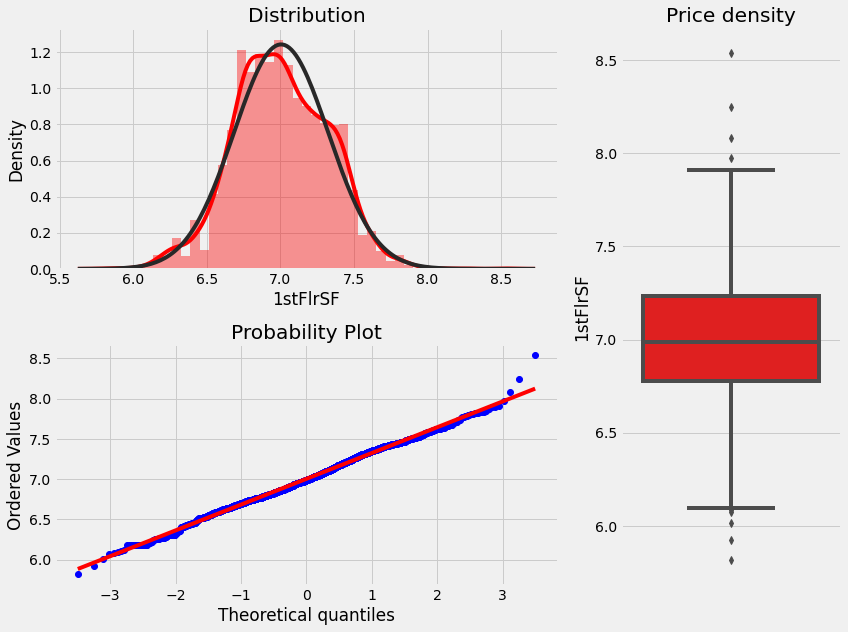

In [44]:
plot_3(all_data, '1stFlrSF') # checking the distribution after log transformation

Now that the distribution for all numerical features is normalized. Time to create some new features

## Creating new features

In [45]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['YrBltAndRemod'] = all_data.YearBuilt + all_data.YearRemodAdd
all_data['TotalBathrooms'] = all_data.BsmtFullBath + (0.5 * all_data.BsmtHalfBath) + all_data.FullBath + (0.5* all_data.HalfBath)
all_data['Total_sqr_footage'] = all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] + all_data['EnclosedPorch']
                                              + all_data['ScreenPorch'] + all_data['WoodDeckSF'])

In [46]:
all_data['HasPool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['Has2ndFlr'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasGarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasBsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasFireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
all_data.shape

(2912, 89)

## Dropping Features 

In [47]:
all_data.drop(['PoolQC', 'Utilities', 'Street'], axis=1, inplace=True)
all_data.shape

(2912, 86)

## Splitting train and test 

In [48]:
X  = all_data.loc[:len(y) - 1  , :]
X_sub = all_data.loc[len(y):, :]
X.shape, X_sub.shape, y.shape

((1453, 86), (1459, 86), (1453,))

## Reducing overfitting 

In [49]:
def reduce_overfitting(df):
    """Function to calculate the amount of 0s in a column and drop any columns in which 99.94 percent of the values are 0"""
    overfit = []
    
    for col in df.columns:
        zero_count = df[col].value_counts().iloc[0]
        if zero_count / len(df) * 100 > 99.94:
            overfit.append(col)
    
    overfit = list(overfit)
    return overfit       
        
overfitted_features = reduce_overfitting(X)
X.drop(overfitted_features, axis=1, inplace=True)
X_sub.drop(overfitted_features, axis=1, inplace=True)
X.shape,y.shape, X_sub.shape

((1453, 82), (1453,), (1459, 82))

More features were made for the train and test set while trying to reduce overfitting

# Modeling the Data 

## Label encoding the data

In [50]:
cat_cols = X.dtypes[X.dtypes == 'object'].index

for col in cat_cols:
    encoder = LabelEncoder().fit(X[col])
    X[col] = encoder.transform(X[col])
    
for col in cat_cols:
    encoder = LabelEncoder().fit(X_sub[col])
    X_sub[col] = encoder.transform(X_sub[col])

X

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,YrBltAndRemod,TotalBathrooms,Total_sqr_footage,Total_porch_sf,HasGarage
0,9,3,65.0,9.042158,1,3,3,4,0,5,2,2,0,5,7,1.945910,2003,2003,1,0,12,13,1,5.288267,2,4,2,2,4,3,2,6.562444,6,0.693147,5.023881,6.754604,1,0,1,4,6.754604,6.752270,0.693147,7.445418,1.098612,0.693147,2,1.098612,3,1.098612,2,2.302585,6,0.693147,3,1,2003.0,2,2.0,548.0,5,5,2,0.693147,4.143135,0.693147,0.693147,0.693147,0.693147,4,1,0.693147,4,2,8,4,20.261479,4006,3.994492,20.762466,6.915723,1
1,4,3,80.0,9.169727,1,3,3,2,0,24,1,2,0,2,6,2.302585,1976,1976,1,0,8,8,2,0.693147,3,4,1,2,4,1,0,6.887553,6,0.693147,5.655992,7.142037,1,0,1,4,7.142037,0.693147,0.693147,7.142037,0.693147,1.098612,2,0.693147,3,1.098612,3,2.079442,6,1.098612,5,1,1976.0,2,2.0,460.0,5,5,2,5.703782,0.693147,0.693147,0.693147,0.693147,0.693147,4,1,0.693147,7,1,8,4,14.977220,3952,3.589027,15.415884,8.476371,1
2,9,3,68.0,9.328301,1,0,3,4,0,5,2,2,0,5,7,1.945910,2001,2002,1,0,12,13,1,5.099866,2,4,2,2,4,2,2,6.190315,6,0.693147,6.077642,6.826545,1,0,1,4,6.826545,6.766192,0.693147,7.488853,1.098612,0.693147,2,1.098612,3,1.098612,2,2.079442,6,1.098612,5,1,2001.0,2,2.0,608.0,5,5,2,0.693147,3.784190,0.693147,0.693147,0.693147,0.693147,4,1,0.693147,11,2,8,4,20.419282,4003,3.994492,20.476200,6.556778,1
3,10,3,60.0,9.164506,1,0,3,0,0,6,2,2,0,5,7,1.945910,1915,1970,1,0,13,15,2,0.693147,3,4,0,4,1,3,0,5.384495,6,0.693147,6.295266,6.630683,1,2,1,4,6.870053,6.630683,0.693147,7.449498,1.098612,0.693147,1,0.693147,3,1.098612,2,2.197225,6,1.098612,2,5,1998.0,3,3.0,642.0,5,5,2,0.693147,3.610918,5.613128,0.693147,0.693147,0.693147,4,1,0.693147,4,0,8,0,20.131420,3885,2.791759,19.578379,11.303488,1
4,9,3,84.0,9.565354,1,0,3,2,0,15,2,2,0,5,8,1.945910,2000,2000,1,0,12,13,1,5.863631,2,4,2,2,4,0,2,6.487684,6,0.693147,6.198479,7.044905,1,0,1,4,7.044905,6.961296,0.693147,7.696213,1.098612,0.693147,2,1.098612,4,1.098612,2,2.397895,6,1.098612,5,1,2000.0,2,3.0,836.0,5,5,2,5.267858,4.454347,0.693147,0.693147,0.693147,0.693147,4,1,0.693147,3,2,8,4,21.051106,4000,3.994492,21.187032,11.801647,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,9,3,62.0,8.977020,1,3,3,4,0,8,2,2,0,5,6,1.945910,1999,2000,1,0,12,13,2,0.693147,3,4,2,2,4,3,6,0.693147,6,0.693147,6.861711,6.861711,1,0,1,4,6.861711,6.545350,0.693147,7.407924,0.693147,0.693147,2,1.098612,3,1.098612,3,2.197225,6,1.098612,5,1,1999.0,2,2.0,460.0,5,5,2,0.693147,3.737670,0.693147,0.693147,0.693147,0.693147,4,1,0.693147,10,1,8,4,20.268772,3999,3.589027,14.793355,6.510258,1
1449,4,3,85.0,9.486228,1,3,3,4,0,14,2,2,0,2,6,2.079442,1978,1988,1,0,9,10,3,4.795791,3,4,1,2,4,3,0,6.674561,5,5.105945,6.381816,7.342132,1,4,1,4,7.637716,0.693147,0.693147,7.637716,1.098612,0.693147,2,0.693147,3,1.098612,3,2.197225,2,1.386294,5,1,1978.0,3,2.0,500.0,5,5,2,5.860786,0.693147,0.693147,0.693147,0.693147,0.693147,2,1,0.693147,4,4,8,4,15.672995,3966,3.791759,20.111370,8.633375,1
1450,10,3,66.0,9.109857,1,3,3,4,0,6

## Splitting the data

In [51]:
 X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=.05, random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1380, 82), (1380,), (73, 82), (73,))

## Scaling the data

In [52]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[0]

array([-0.3328636 ,  1.54180609, -0.17252072, -0.74107583,  0.02296273,
        0.75366551,  0.31492483,  0.60062275, -0.22418041, -1.52728971,
       -0.02733024, -0.03711999, -0.41197043, -0.53979797, -2.99117654,
       -2.79384776, -1.16859728, -1.68870582, -0.4871379 , -0.13077308,
       -3.01702657, -2.94785756,  0.37782745, -0.79415098, -2.26468397,
       -3.7373225 , -1.93419477,  1.00837041, -3.8617591 ,  0.58828171,
        1.26765491, -1.40759   ,  0.3422527 , -0.35303697, -0.07909215,
       -1.15485056,  6.49312735, -0.30466112, -3.83168608, -3.45956894,
       -1.01442745, -0.86776366, -0.13444554, -1.7594441 , -0.8306798 ,
       -0.24152796, -1.02658393, -0.76355011, -2.27394716, -0.20289229,
       -1.63428844, -1.74984992, -5.97594978,  0.7051264 ,  0.78767671,
        1.80264182, -4.05260112, -0.74307244, -2.38652623, -2.23719005,
       -1.9057744 , -2.18670746, -3.67348416, -0.93977918, -1.06531222,
       -0.40721683, -0.1262332 , -0.29439353, -0.06606494,  0.45

## Building a model 

### RidgeRegression 

In [53]:
high_score = 0
high_alpha = 0

for x in np.logspace(-3, 0):
    rid = Ridge(alpha=x, max_iter=10000).fit(X_train, y_train)
    score = rid.score(X_test, y_test)
    if score > high_score:
        high_score = score
        high_alpha = x

print('Ridge Regression:')
print(f'Highest score = {np.round(high_score * 100, 2)}% \nWith alpha = {high_alpha} ')

Ridge Regression:
Highest score = 92.77% 
With alpha = 1.0 


### SGDRegressor 

In [54]:
high_score = 0
high_alpha = 0

for x in np.logspace(-3, 0):
    sgd = SGDRegressor(alpha=x, shuffle=False, max_iter=10000).fit(X_train, y_train)
    score = sgd.score(X_test, y_test)
    if score > high_score:
        high_score = score
        high_alpha = x
    else:
        continue

print('SGDRegressor:')
print(f'Highest score = {np.round(high_score * 100, 2)}% \nWith alpha = {high_alpha} ')

SGDRegressor:
Highest score = 91.91% 
With alpha = 0.022229964825261943 


3 models were implement in a very basic manner and their highest scores were noted down.

# Concluding the results 

## Scaling the test values 

In [55]:
X_sub = StandardScaler().fit_transform(X_sub)
X_sub

array([[-0.56480457, -1.50170239,  0.68484859, ...,  0.68024364,
         0.9477066 ,  0.23604312],
       [-0.56480457, -0.04104653,  0.71585154, ..., -0.13784283,
         0.90406122,  0.23604312],
       [ 0.77120364, -0.04104653,  0.49883089, ...,  1.22138318,
         0.70102568,  0.23604312],
       ...,
       [-0.56480457, -0.04104653,  3.16508463, ..., -0.08714384,
         0.0645223 ,  0.23604312],
       [ 1.84001021, -0.04104653,  0.12679548, ..., -0.47274296,
         0.39161708, -4.23651413],
       [ 0.77120364, -0.04104653,  0.49883089, ...,  1.31956841,
         0.76800337,  0.23604312]])

## Model making and predicting

In [74]:
rkf = RepeatedKFold(n_repeats=5, n_splits=5, random_state=7)
pip = Pipeline([('model', Ridge())])
grid = GridSearchCV(pip, param_grid={'model':[Ridge(), LassoLars()], 
                                                            'model__alpha':np.logspace(-3, 1, 200)}, 
                   n_jobs=-1, verbose=2, return_train_score=True, refit=True, cv=rkf, scoring='r2')
grid.fit(X_train, y_train)

Fitting 25 folds for each of 400 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=7),
             estimator=Pipeline(steps=[('model', Ridge())]), n_jobs=-1,
             param_grid={'model': [Ridge(alpha=10.0), LassoLars()],
                         'model__alpha': array([1.00000000e-03, 1.04737090e-03, 1.09698580e-03, 1.14895100e-03,
       1.20337784e-03, 1.26038293e-03, 1.32008840e-03, 1.38262217e-03,
       1.44811823e-03, 1.51671689e-03, 1...
       4.15040476e+00, 4.34701316e+00, 4.55293507e+00, 4.76861170e+00,
       4.99450512e+00, 5.23109931e+00, 5.47890118e+00, 5.73844165e+00,
       6.01027678e+00, 6.29498899e+00, 6.59318827e+00, 6.90551352e+00,
       7.23263390e+00, 7.57525026e+00, 7.93409667e+00, 8.30994195e+00,
       8.70359136e+00, 9.11588830e+00, 9.54771611e+00, 1.00000000e+01])},
             return_train_score=True, scoring='r2', verbose=2)

In [76]:
grid.best_params_

{'model': Ridge(alpha=10.0), 'model__alpha': 10.0}

In [77]:
df = pd.DataFrame(grid.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,split15_train_score,split16_train_score,split17_train_score,split18_train_score,split19_train_score,split20_train_score,split21_train_score,split22_train_score,split23_train_score,split24_train_score,mean_train_score,std_train_score
0,0.120967,0.028798,0.002702,0.000614,Ridge(alpha=10.0),0.001,"{'model': Ridge(alpha=10.0), 'model__alpha': 0...",0.907539,0.900384,0.896788,0.911440,0.911012,0.895371,0.885222,0.913901,0.906299,0.911841,0.895987,0.908502,0.909755,0.891097,0.919603,0.898226,0.889461,0.913226,0.913822,0.902251,0.919104,0.892044,0.909003,0.904648,0.886976,0.903740,0.009830,200,0.920781,0.92216,0.923327,0.919389,0.919174,0.922954,0.924888,0.918881,0.920404,0.919274,0.923155,0.920507,0.920332,0.923531,0.91792,0.922601,0.924725,0.918808,0.918833,0.921377,0.917336,0.923405,0.91993,0.920781,0.925027,0.92118,0.002215
1,0.067179,0.014241,0.001956,0.000809,Ridge(alpha=10.0),0.00104737,"{'model': Ridge(alpha=10.0), 'model__alpha': 0...",0.907539,0.900384,0.896788,0.911440,0.911012,0.895371,0.885222,0.913901,0.906299,0.911841,0.895987,0.908502,0.909755,0.891097,0.919603,0.898225,0.889461,0.913226,0.913822,0.902251,0.919104,0.892045,0.909003,0.904648,0.886976,0.903740,0.009830,199,0.920781,0.92216,0.923327,0.919389,0.919174,0.922954,0.924888,0.918881,0.920404,0.919274,0.923155,0.920507,0.920332,0.923531,0.91792,0.922601,0.924725,0.918808,0.918833,0.921377,0.917336,0.923405,0.91993,0.920781,0.925027,0.92118,0.002215
2,0.068031,0.014239,0.001792,0.000641,Ridge(alpha=10.0),0.00109699,"{'model': Ridge(alpha=10.0), 'model__alpha': 0...",0.907539,0.900383,0.896788,0.911440,0.911013,0.895371,0.885222,0.913901,0.906299,0.911841,0.895987,0.908502,0.909755,0.891097,0.919603,0.898225,0.889461,0.913226,0.913822,0.902251,0.919104,0.892045,0.909003,0.904648,0.886976,0.903740,0.009830,198,0.920781,0.92216,0.923327,0.919389,0.919174,0.922954,0.924888,0.918881,0.920404,0.919274,0.923155,0.920507,0.920332,0.923531,0.91792,0.922601,0.924725,0.918808,0.918833,0.921377,0.917336,0.923405,0.91993,0.920781,0.925027,0.92118,0.002215
3,0.046409,0.010626,0.001478,0.000643,Ridge(alpha=10.0),0.00114895,"{'model': Ridge(alpha=10.0), 'model__alpha': 0...",0.907539,0.900383,0.896788,0.911440,0.911013,0.895371,0.885222,0.913902,0.906299,0.911841,0.895987,0.908502,0.909755,0.891097,0.919603,0.898225,0.889461,0.913226,0.913822,0.902251,0.919104,0.892045,0.909003,0.904648,0.886976,0.903740,0.009830,197,0.920781,0.92216,0.923327,0.919389,0.919174,0.922954,0.924888,0.918881,0.920404,0.919274,0.923155,0.920507,0.920332,0.923531,0.91792,0.922601,0.924725,0.918808,0.918833,0.921377,0.917336,0.923405,0.91993,0.920781,0.925027,0.92118,0.002215
4,0.059540,0.009733,0.001526,0.000552,Ridge(alpha=10.0),0.00120338,"{'model': Ridge(alpha=10.0), 'model__alpha': 0...",0.907540,0.900383,0.896788,0.911440,0.911014,0.895371,0.885222,0.913902,0.906299,0.911841,0.895987,0.908502,0.909755,0.891097,0.919603,0.898225,0.889461,0.913227,0.913822,0.902251,0.919104,0.892045,0.909003,0.904648,0.886976,0.903740,0.009830,196,0.920781,0.92216,0.923327,0.919389,0.919174,0.922954,0.924888,0.918881,0.920404,0.91927

In [86]:
grid.score(X_test, y_test)

0.9271628368191692

Predicting the prices and reverting the log transformation

In [87]:
predicts = grid.predict(X_sub)
predicts = [np.round(np.expm1(x), 2) for x in predicts] # undoing the log transformation previously 
predicts[:5]

[123075.82, 157946.25, 181809.87, 197237.85, 188454.62]

In [88]:
len(predicts)

1459

## Submission file

In [89]:
rows = list(zip(range(1461, 1461 + len(predicts)), predicts))
rows = [list(x) for x in rows]
rows[:5]

[[1461, 123075.82],
 [1462, 157946.25],
 [1463, 181809.87],
 [1464, 197237.85],
 [1465, 188454.62]]

In [90]:
with open('submission.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ID', 'SalePrice'])
    writer.writerows(rows)

# Fin :)